# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 7.                                     # time limit of the episode
init_pose = np.array([0., 0., 7., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

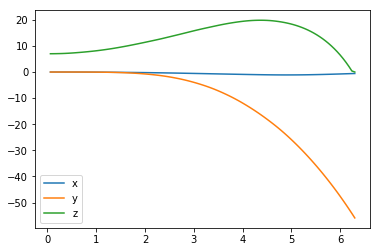

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

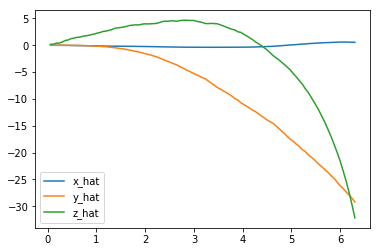

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

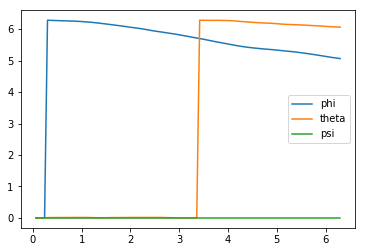

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

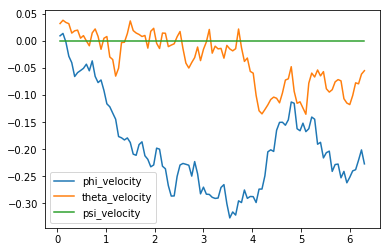

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

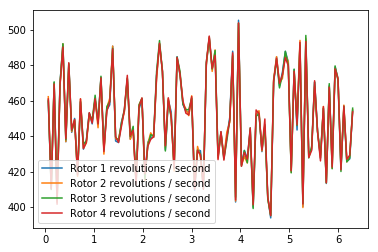

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -0.56314472 -55.86346442   0.           5.06469699   6.06331772
   0.        ]
[  0.54829531 -29.21186505 -32.16327324]
[-0.22700202 -0.0547915   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  26.575 (best =  27.771), noise_scale = 3.2555

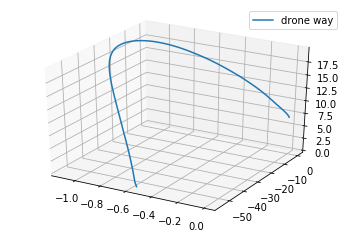

In [10]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
z = results['z']
x = results['x']
y = results['y']
ax.plot(x, y, z, label='drone way')
ax.legend()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [11]:
## TODO: Train your agent here.
import sys
import pandas as pd
import numpy as np
from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 20.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = []
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            if done:
                print("The reward after {} episode is {}".format(i_episode, agent.total_reward))
            break
    sys.stdout.flush()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
The reward after 1 episode is 453.4220442786032
The reward after 2 episode is 453.3682290738231
The reward after 3 episode is 453.9375051396172
The reward after 4 episode is 730.7976696272133
The reward after 5 episode is 1221.7352264306198
The reward after 6 episode is 433.4840160884235
The reward after 7 episode is 713.2686880083465
The reward after 8 episode is 281.3409729544617
The reward after 9 episode is 455.29277546200575
The reward after 10 episode is 522.7843867822526
The reward after 11 episode is 581.4433406254282
The reward after 12 episode is 525.2428461253251
The reward after 13 episode is 920.1608464349473
The reward after 14 episode is 638.8614436584362
The reward after 15 episode is 475.9781418813929
The reward after 16 episode is 442.00573103018826
The reward after 17 episode is 490.0004209009961
The reward after 18 episode is 421.11243815278976
The

The reward after 156 episode is 541.2403897420045
The reward after 157 episode is 409.91712404968746
The reward after 158 episode is 391.73918354103773
The reward after 159 episode is 416.6296672035807
The reward after 160 episode is 495.92612714563415
The reward after 161 episode is 419.70440017158796
The reward after 162 episode is 483.00061692553544
The reward after 163 episode is 555.6447057680772
The reward after 164 episode is 429.56394030966186
The reward after 165 episode is 503.962323776199
The reward after 166 episode is 418.43694191482786
The reward after 167 episode is 468.97651371285275
The reward after 168 episode is 406.1836411161218
The reward after 169 episode is 407.8239150658123
The reward after 170 episode is 485.9776615851053
The reward after 171 episode is 444.83219584392106
The reward after 172 episode is 501.1398513268203
The reward after 173 episode is 397.9767920411728
The reward after 174 episode is 495.35893082752295
The reward after 175 episode is 606.70599

The reward after 320 episode is 728.2339358575318
The reward after 321 episode is 674.247626012396
The reward after 322 episode is 488.5623534613278
The reward after 323 episode is 347.7892939307985
The reward after 324 episode is 685.0637488214592
The reward after 325 episode is 802.5782684489556
The reward after 326 episode is 585.8786095287032
The reward after 327 episode is 329.3155867379952
The reward after 328 episode is 296.3261017736028
The reward after 329 episode is 369.95655768082213
The reward after 330 episode is 427.8809205042571
The reward after 331 episode is 346.18921490935986
The reward after 332 episode is 590.9652555235909
The reward after 333 episode is 1026.0532357562709
The reward after 334 episode is 658.8442630796285
The reward after 335 episode is 693.2456152971538
The reward after 336 episode is 1077.906990821235
The reward after 337 episode is 541.4057864980248
The reward after 338 episode is 570.0579858651239
The reward after 339 episode is 531.239840480976

The reward after 484 episode is 506.132555817773
The reward after 485 episode is 583.468604451384
The reward after 486 episode is 569.1332253381479
The reward after 487 episode is 475.60071169320315
The reward after 488 episode is 479.18384390768455
The reward after 489 episode is 526.8685672865873
The reward after 490 episode is 466.2056057209298
The reward after 491 episode is 488.20186623449365
The reward after 492 episode is 501.22367600247634
The reward after 493 episode is 491.76256781967584
The reward after 494 episode is 567.2838358527862
The reward after 495 episode is 488.3004114306688
The reward after 496 episode is 410.2268460308964
The reward after 497 episode is 539.3989850920962
The reward after 498 episode is 605.5883565146712
The reward after 499 episode is 503.34894573650087
The reward after 500 episode is 488.39559978709696


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

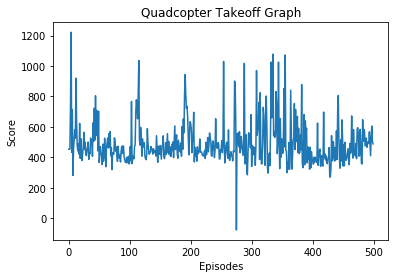

In [16]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.array(agent.rewards))
plt.xlabel('Episodes')
plt.ylabel('Score')
plt.title("Quadcopter Takeoff Graph")
plt.show()

In [13]:
np.mean(agent.rewards[-10:])

508.3731090501363

In [14]:
np.mean(agent.rewards[:10])

571.9431513845368

In [18]:
np.mean(agent.rewards[35:56])

522.9408084827693

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

In the task.py python file , the class task function has the quadcopter which has the initial value of (0,0,0) and target value of (0,0,20). Here, we have calculated the reward value by using self.sim.pose[3] and self.target_pos as below

reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()

Then, calculated the coordinate distance from the target position and created the penalty with the sqrt of coordinate points. Finally , added the bonus value of 10 to reward and subtracting the penalty value which will helpful for the drone to takeoff.



**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

1)In agent.py file, I have used Deep Deterministic Policy Gradients (DDPG) algorithm as suggested in the project. In addition to that, I have imported actor, critic, replay buffer functions. All these functions worked well for me

2) My  final choice of hyperparameters are as follows:
 -gamma = 0.9t, tau = 0.01, exploration_mu = 0 ,exploration_theta = 0.15, exploration_sigma = 0.2

3) In neural network architecture, I have used 'relu' , ‘sigmoid’ activation functions , units 32, 64 and included batch normalization to significant increase in stability.


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

After changing the episodes from 100 to 500,  the episodes with rewards has to increase. From the graph, we can see that reward value actually started with the value 453 and also we can notice that here and there in a few episodes the rewards increased a lot which is about 1221 and decreased to very low as well. After 400 th episode, we can see that the rewards are fluctuating values between 380 to 580 which is ok but it would have been great if the rewards maintained the constant value in the last 50 episodes. Besides this,the best final performance is in the last episodes and with a mean value of 508. 
 


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

This project is surely the hardest one that I have ever done so far. I have to look for the different resources that are freely available on the internet for better understanding.  The hardest part for me is to design the DDPG agent and training the agent. 

